In [1]:
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

crime_df = pd.read_csv('data/crimes.csv')
print(crime_df.head())
print(crime_df.shape)

         ID Case Number                    Date                   Block  IUCR  \
0  10000092    HY189866  03/18/2015 07:44:00 PM         047XX W OHIO ST  041A   
1  10000094    HY190059  03/18/2015 11:00:00 PM  066XX S MARSHFIELD AVE  4625   
2  10000095    HY190052  03/18/2015 10:45:00 PM   044XX S LAKE PARK AVE  0486   
3  10000096    HY190054  03/18/2015 10:30:00 PM    051XX S MICHIGAN AVE  0460   
4  10000097    HY189976  03/18/2015 09:00:00 PM        047XX W ADAMS ST  031A   

    Primary Type              Description Location Description  Arrest  \
0        BATTERY      AGGRAVATED: HANDGUN               STREET   False   
1  OTHER OFFENSE         PAROLE VIOLATION               STREET    True   
2        BATTERY  DOMESTIC BATTERY SIMPLE            APARTMENT   False   
3        BATTERY                   SIMPLE            APARTMENT   False   
4        ROBBERY           ARMED: HANDGUN             SIDEWALK   False   

   Domestic              ...                Ward  Community Area  FB

[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018]


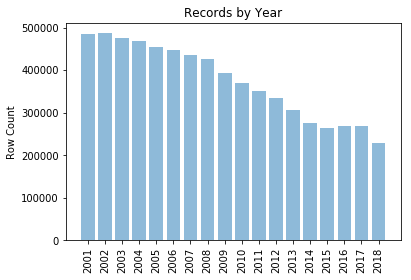

In [2]:
years = crime_df['Year'].unique()
years.sort(axis=0)
print(years)
y_pos = np.arange(len(years))
row_counts = []
for y in years:
    count = crime_df[ crime_df['Year'] == y].shape[0]
    row_counts.append(count)
plt.bar(y_pos, row_counts, align='center', alpha=0.5)
plt.xticks(y_pos, years)
plt.ylabel('Row Count')
plt.title('Records by Year')
plt.xticks(rotation=90)
plt.show()


['BATTERY' 'OTHER OFFENSE' 'ROBBERY' 'NARCOTICS' 'CRIMINAL DAMAGE'
 'WEAPONS VIOLATION' 'THEFT' 'BURGLARY' 'MOTOR VEHICLE THEFT'
 'PUBLIC PEACE VIOLATION' 'DECEPTIVE PRACTICE' 'ASSAULT'
 'CRIMINAL TRESPASS' 'CRIM SEXUAL ASSAULT'
 'INTERFERENCE WITH PUBLIC OFFICER' 'ARSON' 'LIQUOR LAW VIOLATION'
 'KIDNAPPING' 'SEX OFFENSE' 'OFFENSE INVOLVING CHILDREN' 'PROSTITUTION'
 'HOMICIDE' 'GAMBLING' 'INTIMIDATION' 'STALKING' 'OBSCENITY'
 'PUBLIC INDECENCY' 'HUMAN TRAFFICKING'
 'CONCEALED CARRY LICENSE VIOLATION' 'OTHER NARCOTIC VIOLATION'
 'NON - CRIMINAL' 'NON-CRIMINAL' 'RITUALISM'
 'NON-CRIMINAL (SUBJECT SPECIFIED)' 'DOMESTIC VIOLENCE']


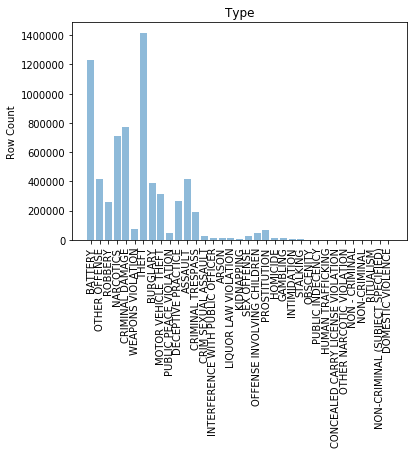

In [3]:
# Crime breakdown by Crime Type

crime_types = crime_df['Primary Type'].unique()
print(crime_types)
y_pos_types = np.arange(len(crime_types))
counts_types = []
for t in crime_types:
    count = crime_df[ crime_df['Primary Type'] == t].shape[0]
    counts_types.append(count)
plt.bar(y_pos_types, counts_types, align='center', alpha=0.5)
plt.xticks(y_pos_types, crime_types)
plt.ylabel('Row Count')
plt.title('Type')
plt.xticks(rotation=90)
plt.show()

[11.  7.  2.  9.  5.  6.  4. 12. 15. 14.  1. 20. 10. 22.  8. 17.  3. 18.
 16. 25. 24. 19. 31. nan 21.]


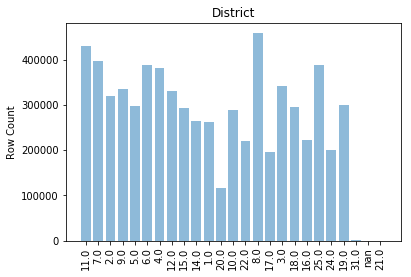

In [4]:
# Crime breakdown by District

districts = crime_df['District'].unique()
print(districts)
y_pos_areas = np.arange(len(districts))
counts_districts = []
for t in districts:
    count = crime_df[ crime_df['District'] == t].shape[0]
    counts_districts.append(count)
plt.bar(y_pos_areas, counts_districts, align='center', alpha=0.5)
plt.xticks(y_pos_areas, districts)
plt.ylabel('Row Count')
plt.title('District')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# TODO Time Series (https://stackoverflow.com/questions/19079143/how-to-plot-time-series-in-python)

In [47]:
# Time series forecast of crimes in 2018
# https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/
cases_2018_df = crime_df[ crime_df['Year'] == 2018]
cases_2018_df['Month'] = pd.to_datetime(cases_2018_df['Date']).dt.month
cases_2018_df['Day'] = pd.to_datetime(cases_2018_df['Date']).dt.day
jan_aug_cases = cases_2018_df[ cases_2018_df['Month'] < 9]
sep_dec_cases = cases_2018_df[ cases_2018_df['Month'] > 8]
# train = jan_aug_cases
# test = sep_dec_cases

cases_2018_df.index = pd.to_datetime(cases_2018_df['Date'])
resmp_df = cases_2018_df.resample('D').mean()
jan_aug_cases.index = pd.to_datetime(jan_aug_cases['Date'])
#jan_aug_cases = jan_aug_cases.resample('D').mean()
sep_dec_cases.index = pd.to_datetime(sep_dec_cases['Date'])
#sep_dec_cases = sep_dec_cases.resample('D').mean()


/Users/marc/PycharmProjects/crime-app/my_venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/marc/PycharmProjects/crime-app/my_venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


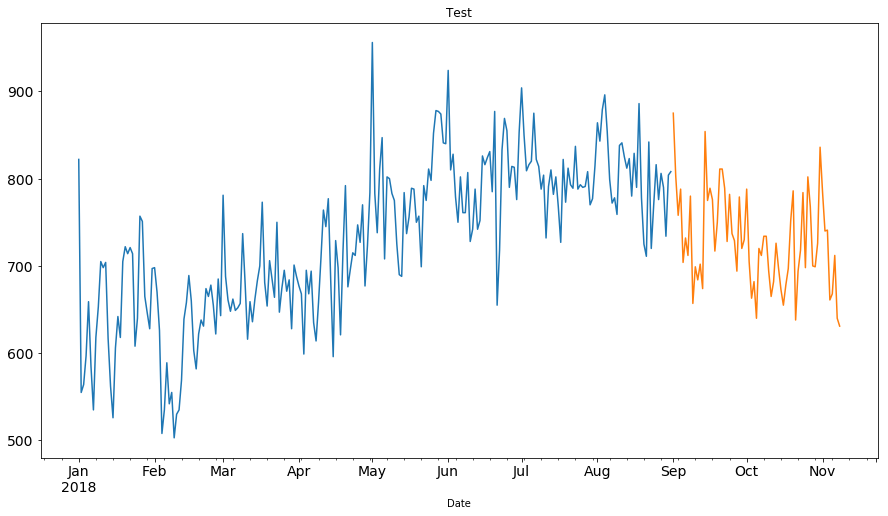

In [65]:
# https://stackoverflow.com/questions/15411158/pandas-countdistinct-equivalent


train = jan_aug_cases.resample('D').apply({'Date': 'count'})
test = sep_dec_cases.resample('D').apply({'Date': 'count'})

train.Date.plot(figsize=(15, 8), title='Train', fontsize=14)
test.Date.plot(figsize=(15, 8), title='Test', fontsize=14)
plt.show()
